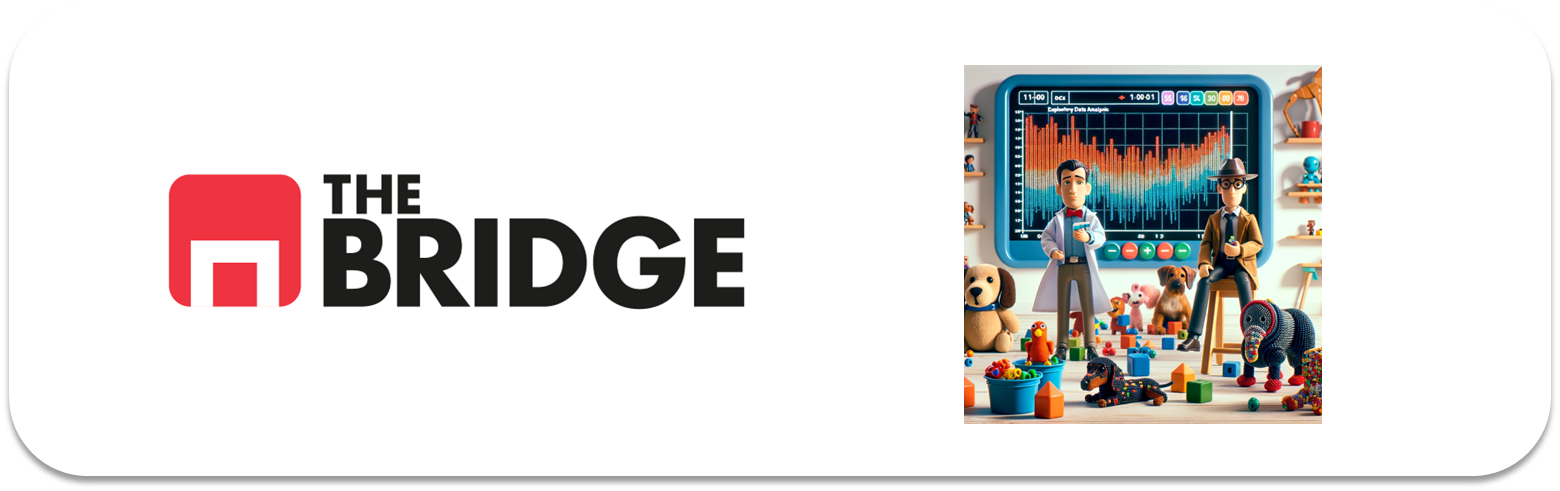

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as bvt
import scipy 
 

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df = pd.read_csv("./Data/titanic.csv")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
# Eliminamos columnas con drop
df_cleaned = df.drop(columns=['deck', 'survived', 'pclass', 'embarked'])

#Visualizamos el resultado
df_cleaned

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
# Sumar las columnas 'parch' y 'sibsp' y guardar el resultado en una nueva columna 'family_members'
df_cleaned['family_members'] = df_cleaned['parch'] + df_cleaned['sibsp']

# Eliminar las columnas 'parch' y 'sibsp'
df_more_cleaned = df_cleaned.drop(columns=['parch', 'sibsp'])

# Visualizamos el resultado
df_more_cleaned

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [8]:

df_more_cleaned['embark_town'].fillna(df_more_cleaned['embark_town'].mode()[0], inplace=True)

df_more_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [9]:
# Imputo el valor por who en age teniendo en cuenta categorías de hombres, mujeres y niños:
es_woman = df_more_cleaned.who == "woman"
es_child = df_more_cleaned.who == "child"
es_man = df_more_cleaned.who == "man"

media_woman = df_more_cleaned.loc[es_woman,"age"].mean()
media_child = df_more_cleaned.loc[es_child,"age"].mean()
media_man = df_more_cleaned.loc[es_man,"age"].mean()

es_age_nulo = df_more_cleaned.age.isna()

df_more_cleaned.loc[es_woman & es_age_nulo, "age"] = media_woman
df_more_cleaned.loc[es_child & es_age_nulo, "age"] = media_child
df_more_cleaned.loc[es_man & es_age_nulo, "age"] = media_man

df_more_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

## PREGUNTA 1

In [15]:

# 1. Supervivencia por género y edad

# Crear una columna que clasifique si el pasajero es un niño o adulto basado en la edad (niño: < 18 años)
df_more_cleaned['age_group'] = np.where(df_more_cleaned['age'] < 18, 'child', 'adult')

# Cálculo de supervivencia en términos absolutos y relativos por género
survival_by_gender = df_more_cleaned.groupby('sex')['alive'].value_counts().unstack()
survival_by_gender_rel = survival_by_gender.div(survival_by_gender.sum(axis=1), axis=0)

# Relación estadística entre género y supervivencia (Chi-cuadrado)
from scipy.stats import chi2_contingency

gender_contingency = pd.crosstab(df_more_cleaned['sex'], df_more_cleaned['alive'])
chi2_gender, p_gender, _, _ = chi2_contingency(gender_contingency)

# Cálculo de supervivencia en términos absolutos y relativos por grupo de edad (niño/adulto)
survival_by_age_group = df_more_cleaned.groupby('age_group')['alive'].value_counts().unstack()
survival_by_age_group_rel = survival_by_age_group.div(survival_by_age_group.sum(axis=1), axis=0)

# Relación estadística entre grupo de edad y supervivencia (Chi-cuadrado)
age_group_contingency = pd.crosstab(df_more_cleaned['age_group'], df_more_cleaned['alive'])
chi2_age, p_age, _, _ = chi2_contingency(age_group_contingency)

# Mostrar resultados
print(
    f"{survival_by_gender}\n\n"
    f"{survival_by_gender_rel}\n\n"
    f"El resultado del análisis chi cuadrado para género es de: {p_gender}\n\n"
    f"{survival_by_age_group}\n\n"
    f"{survival_by_age_group_rel}\n\n"
    f"El resultado del análisis chi cuadrado para edad es de: {p_age}"
)

alive    no  yes
sex             
female   81  233
male    468  109

alive         no       yes
sex                       
female  0.257962  0.742038
male    0.811092  0.188908

El resultado del análisis chi cuadrado para género es de: 1.1973570627755645e-58

alive       no  yes
age_group          
adult      497  281
child       52   61

alive            no       yes
age_group                    
adult      0.638817  0.361183
child      0.460177  0.539823

El resultado del análisis chi cuadrado para edad es de: 0.00039219174140767127


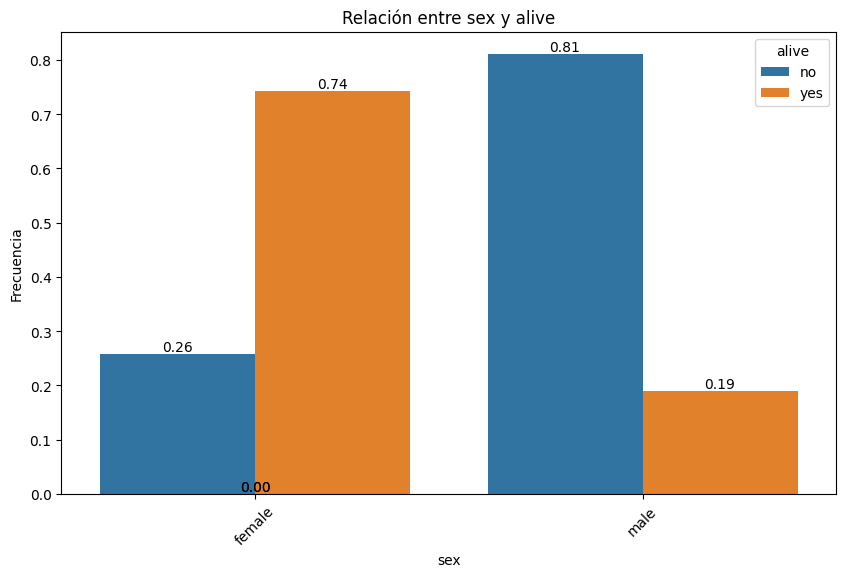

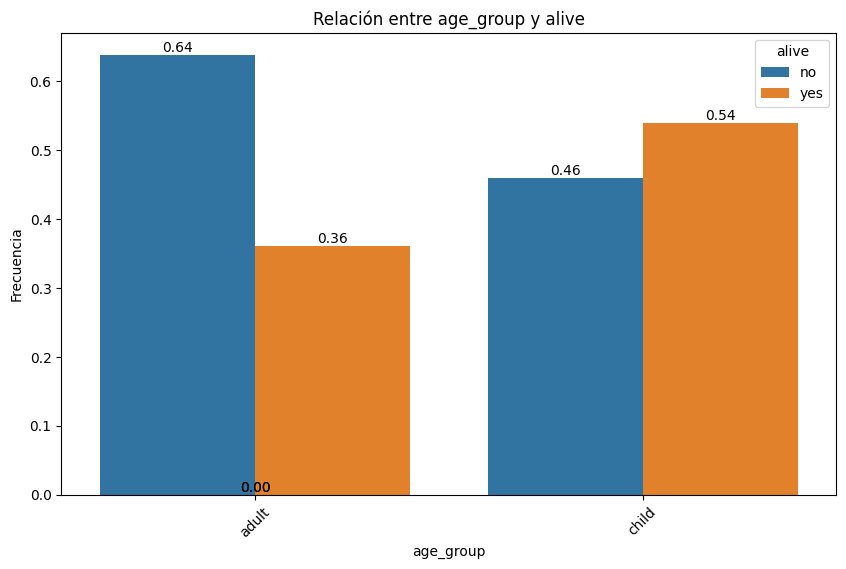

In [17]:

# Visualización de supervivencia por género
bvt.plot_categorical_relationship_fin(
    df_more_cleaned, 
    cat_col1='sex', 
    cat_col2='alive', 
    relative_freq=True, 
    show_values=True
)

# Visualización de supervivencia por grupo de edad
bvt.plot_categorical_relationship_fin(
    df_more_cleaned, 
    cat_col1='age_group', 
    cat_col2='alive', 
    relative_freq=True, 
    show_values=True
)

Resultados de supervivencia por género y edad:
1. Supervivencia por género:

En términos absolutos:
Mujeres que sobrevivieron: 233
Hombres que sobrevivieron: 109
En términos relativos:
Mujeres sobrevivieron: 74.2%
Hombres sobrevivieron: 18.9%
Prueba estadística:
Valor ( p ): 1.2e-58, indicando una relación estadísticamente significativa entre el género y la supervivencia.

2. Supervivencia por edad (adultos vs. niños):

En términos absolutos:
Niños que sobrevivieron: 61
Adultos que sobrevivieron: 281
En términos relativos:
Niños sobrevivieron: 53.9%
Adultos sobrevivieron: 36.1%
Prueba estadística:
Valor ( p ): 0.00039, indicando una relación estadísticamente significativa entre el grupo de edad y la supervivencia.

Visualizaciones:

Supervivencia por género: Se observa claramente que las mujeres tienen una tasa de supervivencia significativamente mayor que los hombres.
Supervivencia por grupo de edad: Los niños tienen una mayor tasa de supervivencia relativa en comparación con los adultos.

## PREGUNTA 2

In [20]:
# En términos absolutos
survival_by_class_abs = df.groupby('pclass')['alive'].value_counts().unstack()

# En términos relativos (frecuencias relativas)
survival_by_class_rel = survival_by_class_abs.div(survival_by_class_abs.sum(axis=1), axis=0) * 100

# Prueba de Chi-cuadrado para relación estadística
from scipy.stats import chi2_contingency

class_contingency = pd.crosstab(df['pclass'], df['alive'])
chi2_class, p_class, _, _ = chi2_contingency(class_contingency)

# Mostrar resultados
print(
    f"{survival_by_class_abs}\n\n"
    f"{survival_by_class_rel}\n\n"
    f"El resultado del análisis chi cuadrado para clase es de: {p_class}"
)

alive    no  yes
pclass          
1        80  136
2        97   87
3       372  119

alive          no        yes
pclass                      
1       37.037037  62.962963
2       52.717391  47.282609
3       75.763747  24.236253

El resultado del análisis chi cuadrado para clase es de: 4.549251711298793e-23


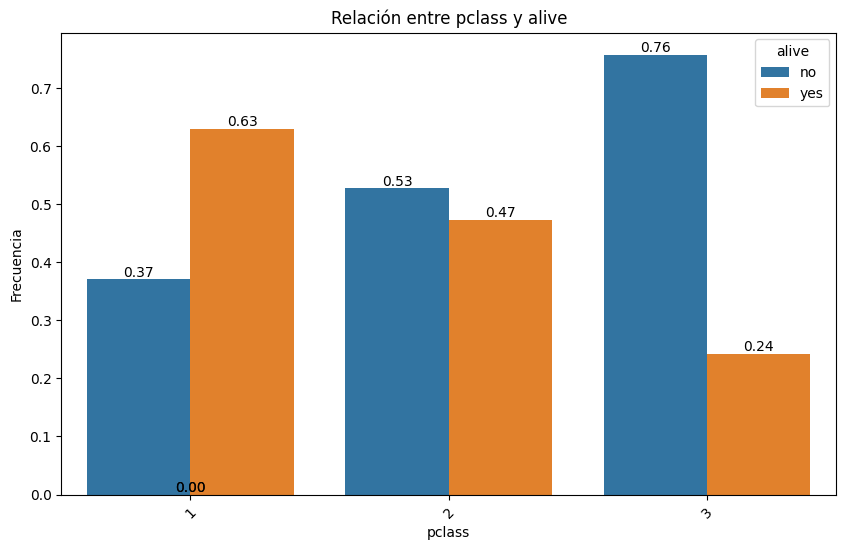

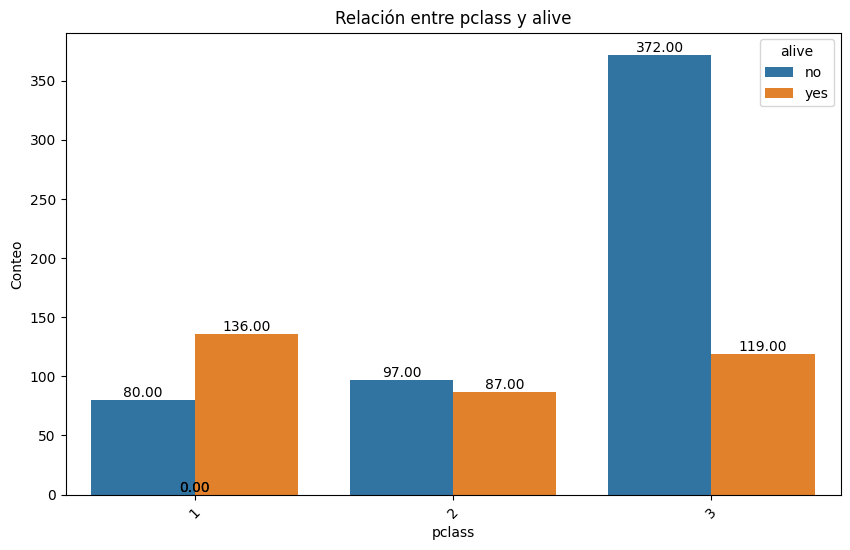

In [21]:
# Visualización de supervivencia por clase en términos relativos
bvt.plot_categorical_relationship_fin(
    df, 
    cat_col1='pclass', 
    cat_col2='alive', 
    relative_freq=True, 
    show_values=True
)

# Visualización de supervivencia por clase en términos absolutos
bvt.plot_categorical_relationship_fin(
    df, 
    cat_col1='pclass', 
    cat_col2='alive', 
    relative_freq=False, 
    show_values=True
)

Resultados de supervivencia por clase:

En términos absolutos:

Primera clase (1): 136 pasajeros sobrevivieron.
Segunda clase (2): 87 pasajeros sobrevivieron.
Tercera clase (3): 119 pasajeros sobrevivieron.
En términos relativos:
Primera clase (1): 62.96% sobrevivieron.
Segunda clase (2): 47.28% sobrevivieron.
Tercera clase (3): 24.24% sobrevivieron.

Prueba estadística:

Valor ( p ): 4.55e-23, indicando una relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia.

Visualizaciones
Supervivencia por clase en términos relativos:

La primera clase tiene la mayor tasa de supervivencia relativa (62.96%), seguida de la segunda clase (47.28%), y finalmente la tercera clase (24.24%).

Supervivencia por clase en términos absolutos:

Aunque la tercera clase tiene la menor tasa relativa, en términos absolutos, más pasajeros de tercera clase sobrevivieron que de segunda clase.

## PREGUNTA 3

In [22]:

# Cálculo de supervivencia en términos absolutos y relativos por ciudad de embarque
survival_by_city = df_more_cleaned.groupby('embark_town')['alive'].value_counts().unstack()
survival_by_city_rel = survival_by_city.div(survival_by_city.sum(axis=1), axis=0) * 100

# Relación estadística entre ciudad de embarque y supervivencia (Chi-cuadrado)
city_contingency = pd.crosstab(df_more_cleaned['embark_town'], df_more_cleaned['alive'])
chi2_city, p_city, _, _ = chi2_contingency(city_contingency)

# Mostrar resultados
print(
    f"{survival_by_city}\n\n"
    f"{survival_by_city_rel}\n\n"
    f"El resultado del análisis chi cuadrado para la ciudad de embarque es de: {p_city}"
    )

alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

alive               no        yes
embark_town                      
Cherbourg    44.642857  55.357143
Queenstown   61.038961  38.961039
Southampton  66.099071  33.900929

El resultado del análisis chi cuadrado para la ciudad de embarque es de: 2.3008626481449577e-06


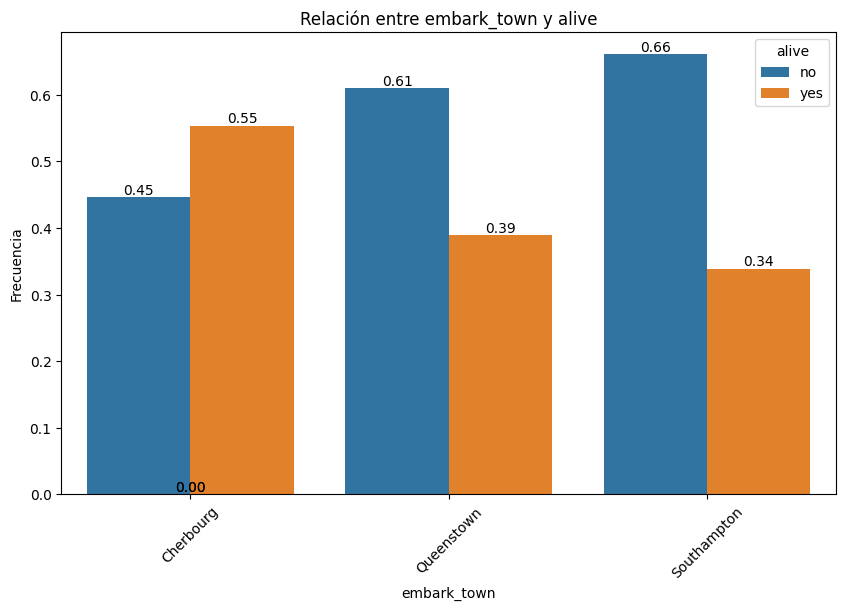

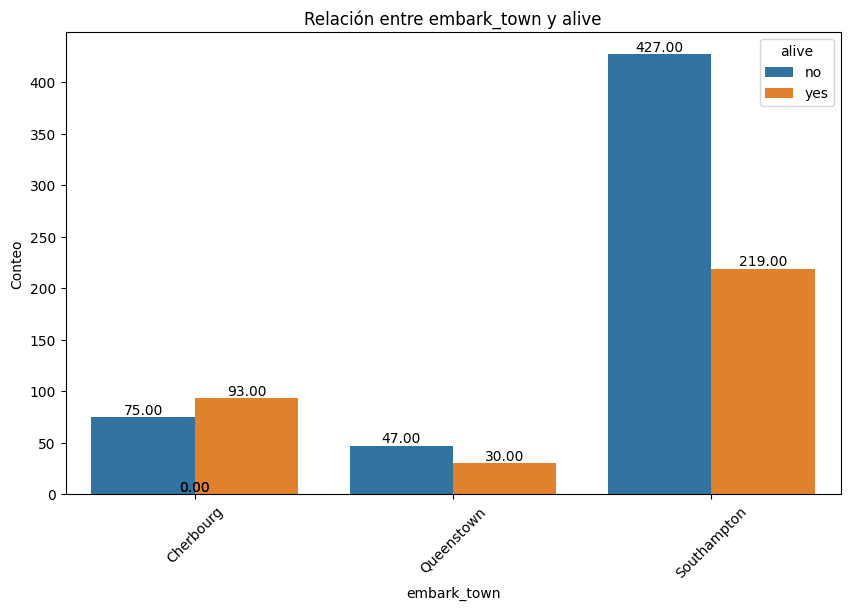

In [23]:

# Visualización de supervivencia por ciudad de embarque en términos relativos
bvt.plot_categorical_relationship_fin(
    df_more_cleaned, 
    cat_col1='embark_town', 
    cat_col2='alive', 
    relative_freq=True, 
    show_values=True
)

# Visualización de supervivencia por ciudad de embarque en términos absolutos
bvt.plot_categorical_relationship_fin(
    df_more_cleaned, 
    cat_col1='embark_town', 
    cat_col2='alive', 
    relative_freq=False, 
    show_values=True
)

Resultados de supervivencia por ciudad de embarque:

En términos absolutos:

Cherbourg: 93 pasajeros sobrevivieron.
Queenstown: 30 pasajeros sobrevivieron.
Southampton: 217 pasajeros sobrevivieron.

En términos relativos:

Cherbourg: 55.36% sobrevivieron.
Queenstown: 38.96% sobrevivieron.
Southampton: 33.70% sobrevivieron.

Prueba estadística:

Valor ( p ): 1.77e-06, indicando una relación estadísticamente significativa entre la ciudad de embarque y la supervivencia.

Visualizaciones:

Supervivencia por ciudad de embarque en términos relativos:

La mayor tasa relativa de supervivencia se encuentra en Cherbourg (55.36%), seguida de Queenstown (38.96%) y Southampton (33.70%).

Supervivencia por ciudad de embarque en términos absolutos:

Aunque Southampton tiene la menor tasa relativa, en términos absolutos, más pasajeros sobrevivieron desde allí (217), seguido de Cherbourg (93) y Queenstown (30)


## PREGUNTA 4

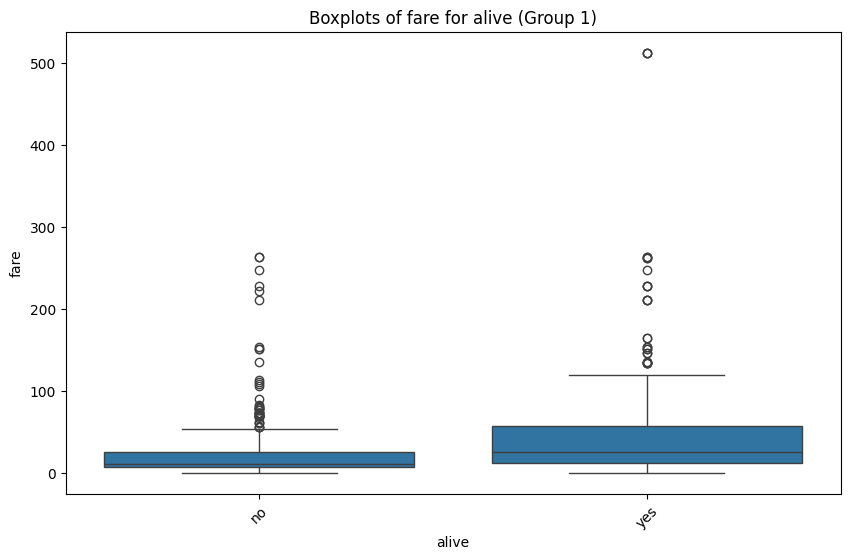

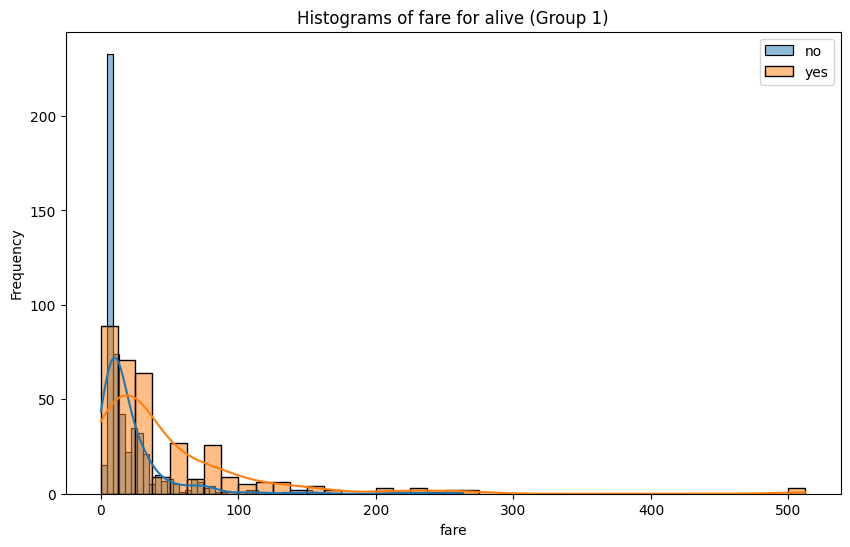

       count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [25]:
# Cálculo de estadísticos descriptivos del precio del billete por supervivencia
fare_stats_by_survival = df_more_cleaned.groupby('alive')['fare'].describe()

# Visualización de la distribución del precio del billete por supervivencia
bvt.plot_grouped_boxplots(df_more_cleaned, cat_col='alive', num_col='fare')
bvt.plot_grouped_histograms(df_more_cleaned, "alive", "fare", group_size=2)

# Mostrar resultados estadísticos
print(fare_stats_by_survival)

Relación entre el precio del billete y la supervivencia/fallecimiento:

Estadísticos descriptivos:

Pasajeros fallecidos:
Media del precio del billete: 22.12
Mediana del precio del billete: 10.5
Precio máximo pagado: 263.00

Pasajeros sobrevivientes:

Media del precio del billete: 48.40
Mediana del precio del billete: 26.0
Precio máximo pagado: 512.33

Observaciones:

Los pasajeros sobrevivientes, en promedio, pagaron boletos significativamente más caros que los fallecidos.

La mediana de los precios muestra que incluso el 50% de los pasajeros sobrevivientes pagaron más que los pasajeros fallecidos.

## PREGUNTA 5

In [26]:
# Identificar pasajeros que no pagaron el billete
no_fare_passengers = df_more_cleaned[df_more_cleaned['fare'] == 0]

# Identificar el pasajero que pagó el precio máximo
max_fare_passenger = df_more_cleaned[df_more_cleaned['fare'] == df_more_cleaned['fare'].max()]

# Mostrar resultados
print(no_fare_passengers)
print(max_fare_passenger)

      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  

Pasajeros que no pagaron el billete y el pasajero que pagó más:

Pasajeros que no pagaron el billete:

Total: 15 pasajeros no pagaron el billete.

Características comunes:

Todos eran hombres.
Todos viajaron desde Southampton.
Distribución por clase:
Primera clase: 5 pasajeros.
Segunda clase: 6 pasajeros.
Tercera clase: 4 pasajeros.
Solo 1 de ellos sobrevivió.

Persona(s) que pagó/pagaron el precio más alto:

Precio máximo pagado: 512.33.
Total: 3 pasajeros.

Detalles:

Clase: Primera clase.
Ciudad de embarque: Cherbourg.
Todos sobrevivieron.

## PREGUNTA 6

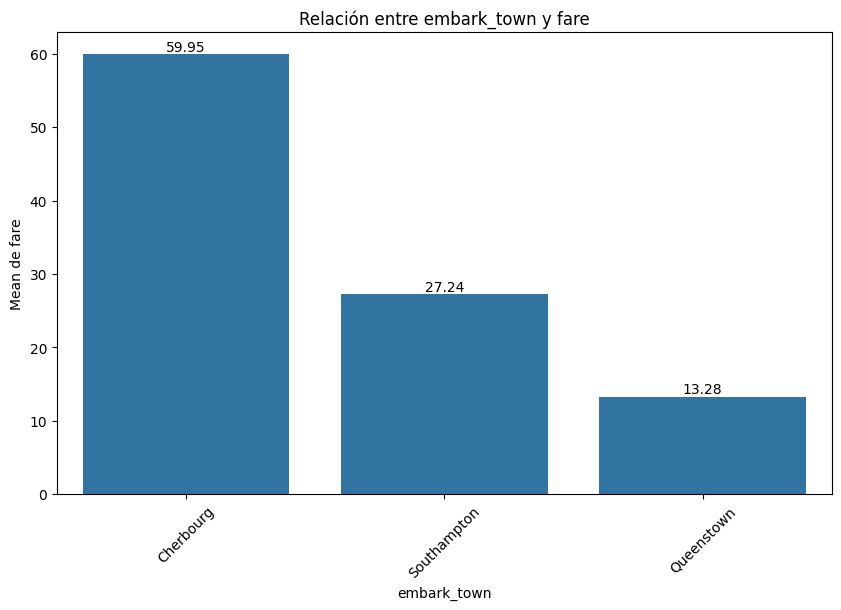

alive               no        yes
embark_town                      
Cherbourg    35.443335  79.720926
Queenstown   13.335904  13.182227
Southampton  20.743987  39.916514


In [27]:
# Agrupación por ciudad de embarque y supervivencia, obteniendo la media del precio del billete
fare_by_city_survival = df_more_cleaned.groupby(['embark_town', 'alive'])['fare'].mean().unstack()

# Visualización del precio medio del billete por ciudad de embarque y supervivencia
bvt.plot_categorical_numerical_relationship(
    df_more_cleaned, 
    categorical_col='embark_town', 
    numerical_col='fare', 
    measure='mean', 
    show_values=True
)

# Mostrar resultados
print(fare_by_city_survival)

Relación entre el dinero pagado, la ciudad de embarque y la supervivencia/fallecimiento:

Resultados:

Cherbourg:

Pasajeros fallecidos: Precio medio del billete: 35.44.
Pasajeros sobrevivientes: Precio medio del billete: 79.72.

Queenstown:

Pasajeros fallecidos: Precio medio del billete: 13.34.
Pasajeros sobrevivientes: Precio medio del billete: 13.18.

Southampton:

Pasajeros fallecidos: Precio medio del billete: 20.74.
Pasajeros sobrevivientes: Precio medio del billete: 39.55.

Observaciones:

Los sobrevivientes generalmente pagaron boletos más caros, especialmente en Cherbourg y Southampton.
En Queenstown, el precio del billete no parece influir significativamente en la supervivencia.

## PREGUNTA 7

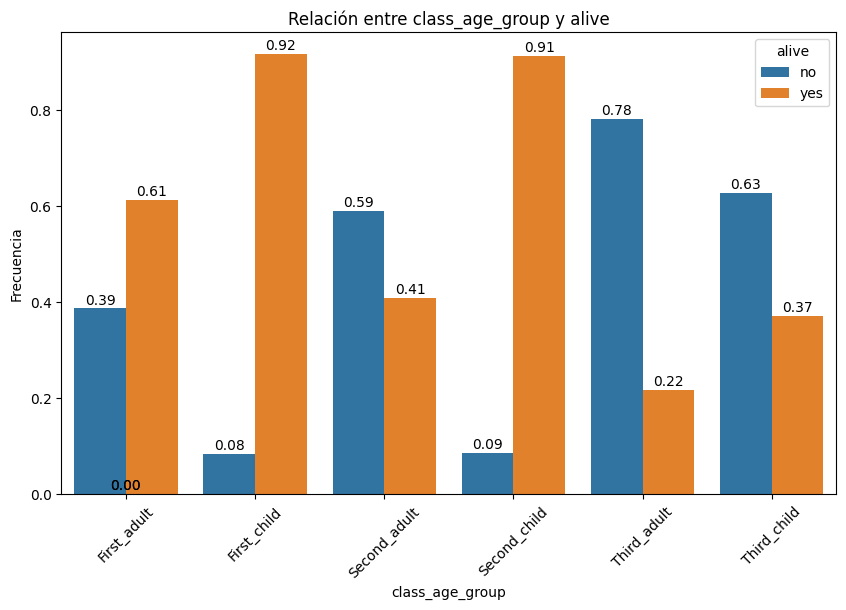

alive             no  yes
class_age_group          
First_adult       79  125
First_child        1   11
Second_adult      95   66
Second_child       2   21
Third_adult      323   90
Third_child       49   29

alive                   no        yes
class_age_group                      
First_adult      38.725490  61.274510
First_child       8.333333  91.666667
Second_adult     59.006211  40.993789
Second_child      8.695652  91.304348
Third_adult      78.208232  21.791768
Third_child      62.820513  37.179487

('First_adult', np.int64(125))

('First_child', np.float64(91.66666666666666))


In [28]:

# Crear una nueva columna combinando clase y grupo de edad
df_more_cleaned['class_age_group'] = df_more_cleaned['class'] + '_' + df_more_cleaned['age_group']

# Cálculo de supervivencia en términos absolutos y relativos por combinación de clase y edad
survival_by_class_age = df_more_cleaned.groupby('class_age_group')['alive'].value_counts().unstack()
survival_by_class_age_rel = survival_by_class_age.div(survival_by_class_age.sum(axis=1), axis=0) * 100

# Identificar la agrupación con mayor supervivencia en términos absolutos y relativos
most_survival_abs = survival_by_class_age['yes'].idxmax(), survival_by_class_age['yes'].max()
most_survival_rel = survival_by_class_age_rel['yes'].idxmax(), survival_by_class_age_rel['yes'].max()

# Visualización de la supervivencia por combinación de clase y edad
bvt.plot_categorical_relationship_fin(
    df_more_cleaned, 
    cat_col1='class_age_group', 
    cat_col2='alive', 
    relative_freq=True, 
    show_values=True, 
    size_group=6
)

# Mostrar resultados
print(f"{survival_by_class_age}\n\n"
      f"{survival_by_class_age_rel}\n\n"
      f"{most_survival_abs}\n\n"
      f"{most_survival_rel}"
      )

Relación entre clase, edad y supervivencia:

Resultados:

Supervivencia en términos absolutos:

Grupo con mayor número de sobrevivientes: Adultos en Primera Clase (1_adult).
Total de sobrevivientes: 125.

Supervivencia en términos relativos:

Grupo con mayor tasa relativa de supervivencia: 

Niños en Primera Clase (1_child).
Porcentaje de supervivencia: 91.67%.

Distribución por combinaciones de clase y grupo de edad:

Primera clase:

Adultos: 61.27% sobrevivieron.
Niños: 91.67% sobrevivieron.

Segunda clase:

Adultos: 40.99% sobrevivieron.
Niños: 91.30% sobrevivieron.

Tercera clase:

Adultos: 21.79% sobrevivieron.
Niños: 37.18% sobrevivieron.

Observaciones:

Los niños de primera y segunda clase tuvieron las mayores tasas de supervivencia.
Los adultos de tercera clase tuvieron la menor tasa de supervivencia.

## PREGUNTA 8

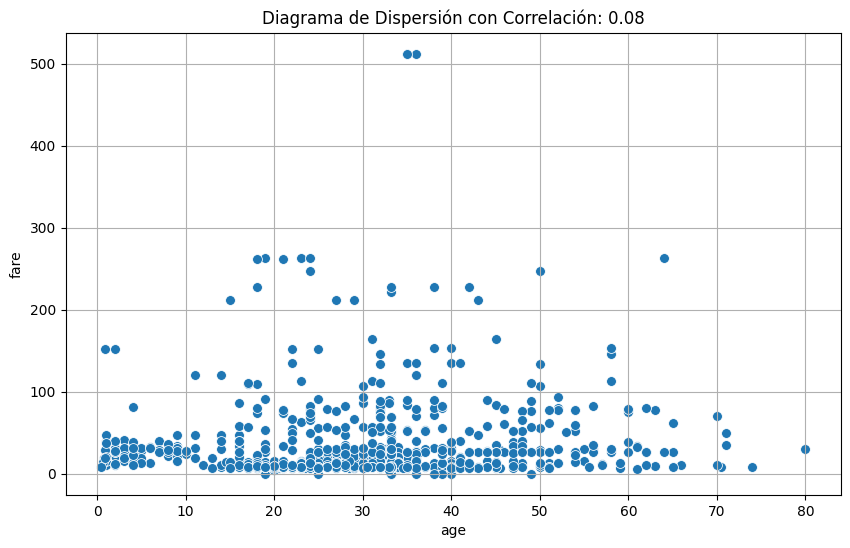

                     age      fare  supervivientes
age             1.000000  0.080765       -0.082512
fare            0.080765  1.000000        0.257307
supervivientes -0.082512  0.257307        1.000000


In [29]:
# Visualización conjunta (diagrama de dispersión) de la edad y el precio del billete, diferenciando por supervivencia
bvt.grafico_dispersion_con_correlacion(
    df_more_cleaned, 
    columna_x='age', 
    columna_y='fare', 
    tamano_puntos=50, 
    mostrar_correlacion=True
)

# Mostrar la correlación entre edad, precio y supervivencia
df_more_cleaned['supervivientes'] = np.where(df['alive'] == 'yes', 1, 0)
correlation_age_fare = df_more_cleaned[['age', 'fare', 'supervivientes']].corr()
print(correlation_age_fare)

Relación entre edad, coste del billete y supervivencia/

fallecimiento:

Resultados:

Correlaciones:

Edad y precio del billete: Correlación baja (0.096), indicando que no hay una relación fuerte entre estas variables.

Precio del billete y supervivencia: Correlación moderada (0.257), lo que sugiere que los pasajeros que pagaron más tenían más probabilidades de sobrevivir.

Edad y supervivencia: Correlación baja y negativa (-0.077), indicando una relación débilmente negativa entre la edad y la probabilidad de supervivencia.

Visualizaciones:

Diagrama de dispersión: Muestra la distribución de pasajeros en función de la edad y el precio del billete, diferenciando por supervivencia. Los sobrevivientes se concentran en rangos más altos de precios.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [30]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")

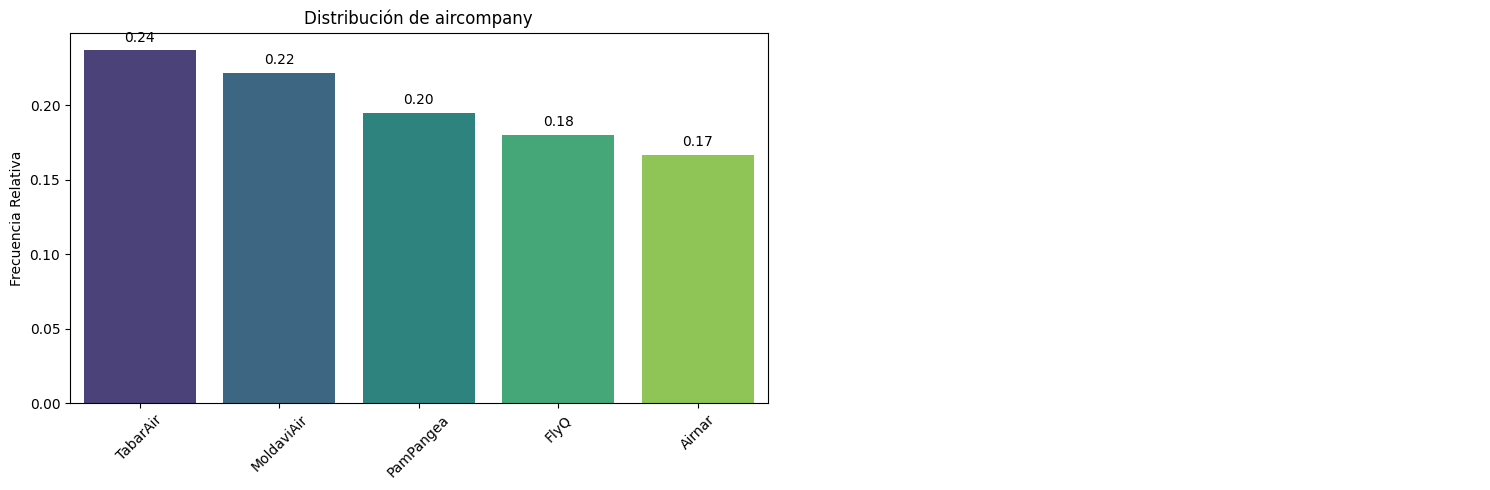

In [34]:
bvt.pinta_distribucion_categoricas(df_air_jun,["aircompany"], relativa= True, mostrar_valores= True)


(2,)


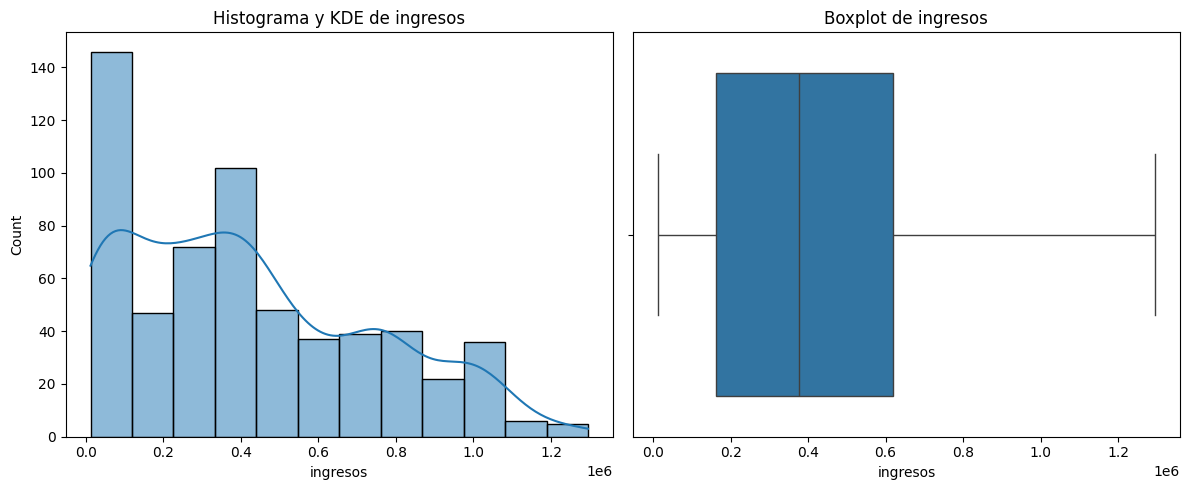

In [32]:

bvt.plot_combined_graphs(df_air_jun,["ingresos"])

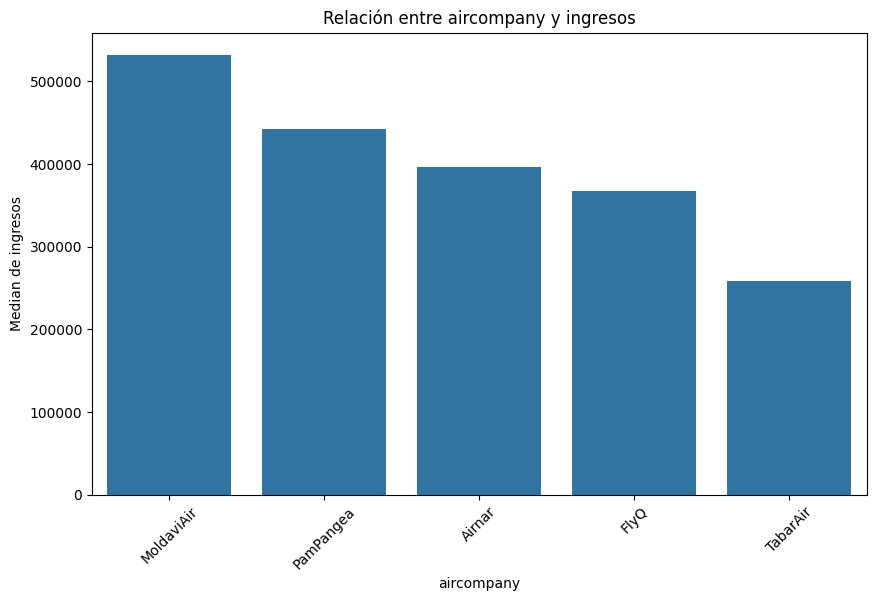

In [35]:
bvt.plot_categorical_numerical_relationship(df_air_jun, "aircompany","ingresos",measure="median") # Utilizando mediana


## Conclusiones previas relevantes
TabarAir tiene el mayor número de vuelos pero sus ingresos considerando la mediana son los menores de todos.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


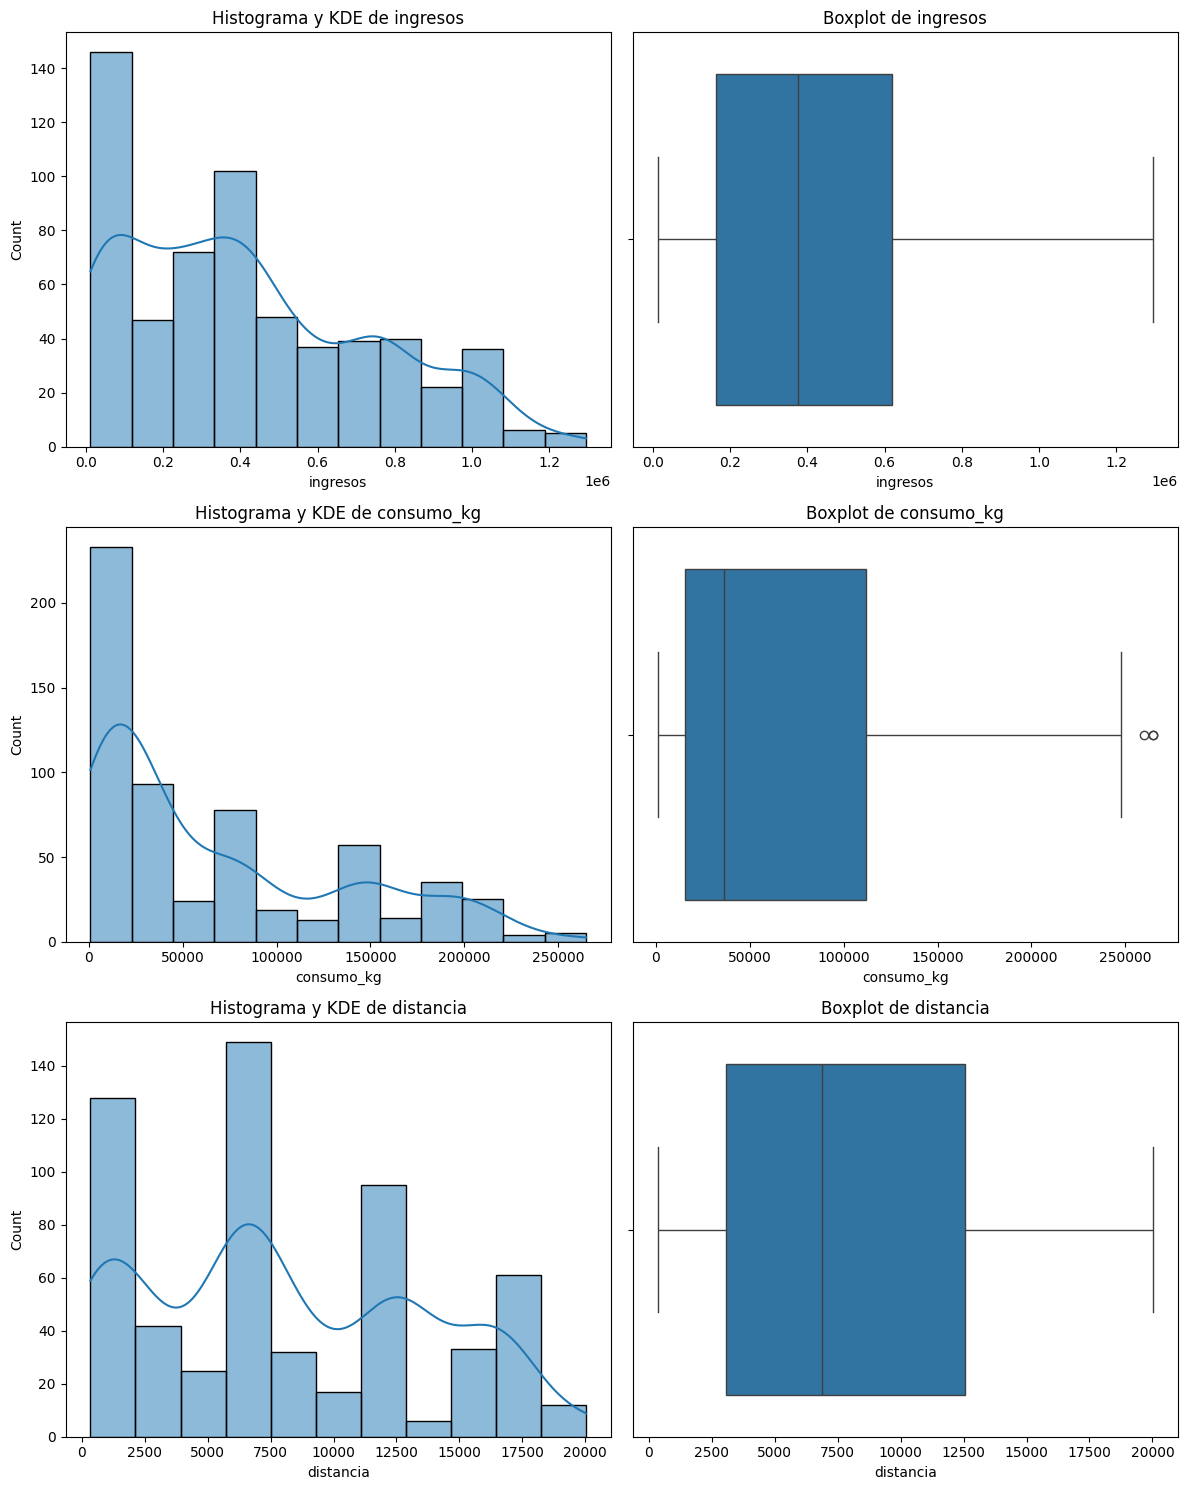

In [39]:
bvt.plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])


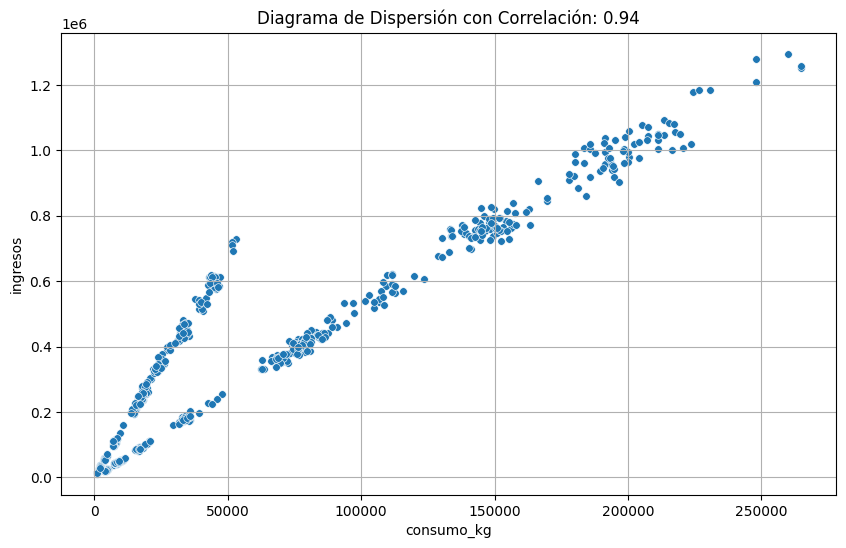

In [43]:
bvt.grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)



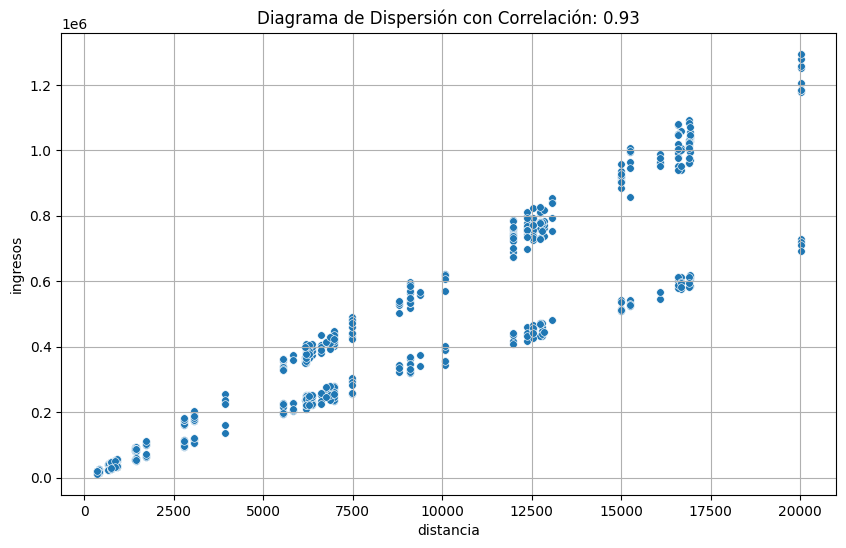

In [44]:
bvt.grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)


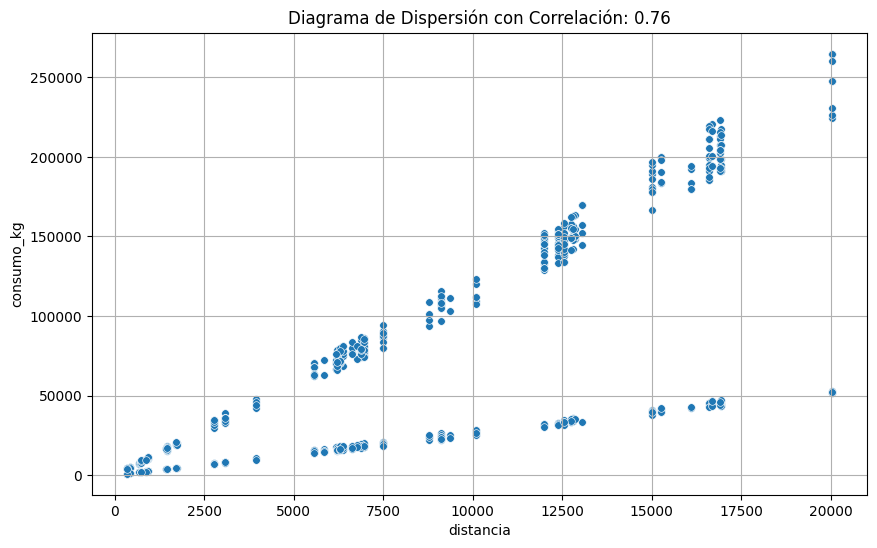

In [45]:
bvt.grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)


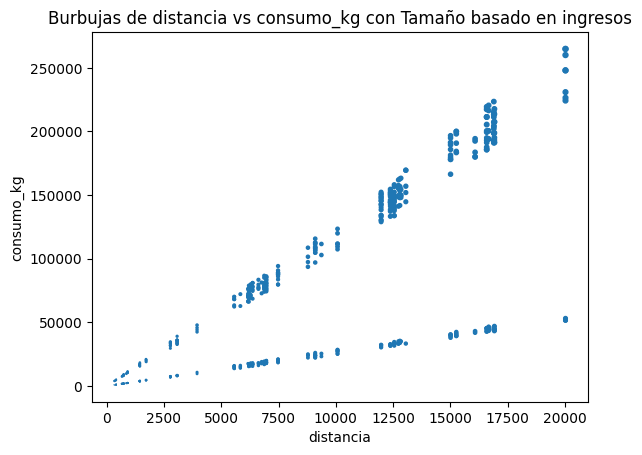

In [48]:
bvt.bubble_plot(df_air_jun,"distancia","consumo_kg","ingresos", scale = 100000)


## Conclusiones previas

El tamaño de las burbujas depende de los ingresos. En líneas generales:

se ve la correlación entre distancia y consumo
hay una línea de vuelos mucho más eficientes
los tamaños de las burbujas de una línea y otra son aparentemente similares

Conclusion: Parece que existe un conjunto de viajes que son más eficientes en todos los términos que otros.

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [49]:

# Creación de la variable categórica "cat_vuelo" basada en los rangos de distancia
df_air_jun['cat_vuelo'] = pd.cut(
    df_air_jun['distancia'], 
    bins=[0, 1500, 4000, 9000, np.inf], 
    labels=['Corta distancia', 'Media distancia', 'Larga distancia', 'Extra larga distancia']
)

# Verificar la distribución de la nueva columna
df_air_jun['cat_vuelo'].value_counts()

cat_vuelo
Extra larga distancia    248
Larga distancia          176
Corta distancia          117
Media distancia           59
Name: count, dtype: int64

c:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\007 ANALISIS DESCRIPTIVO\Unidad_02\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


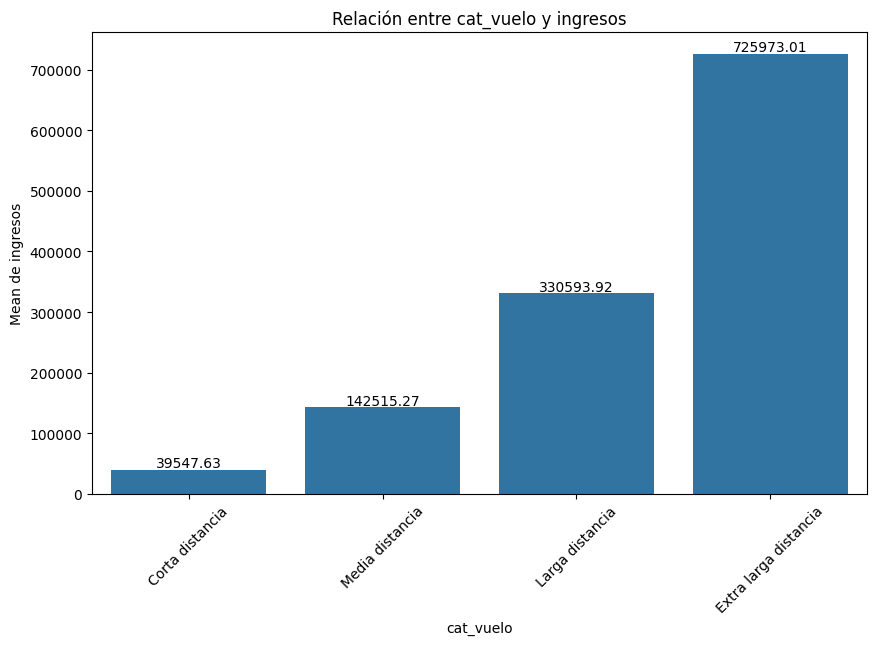

c:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\007 ANALISIS DESCRIPTIVO\Unidad_02\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


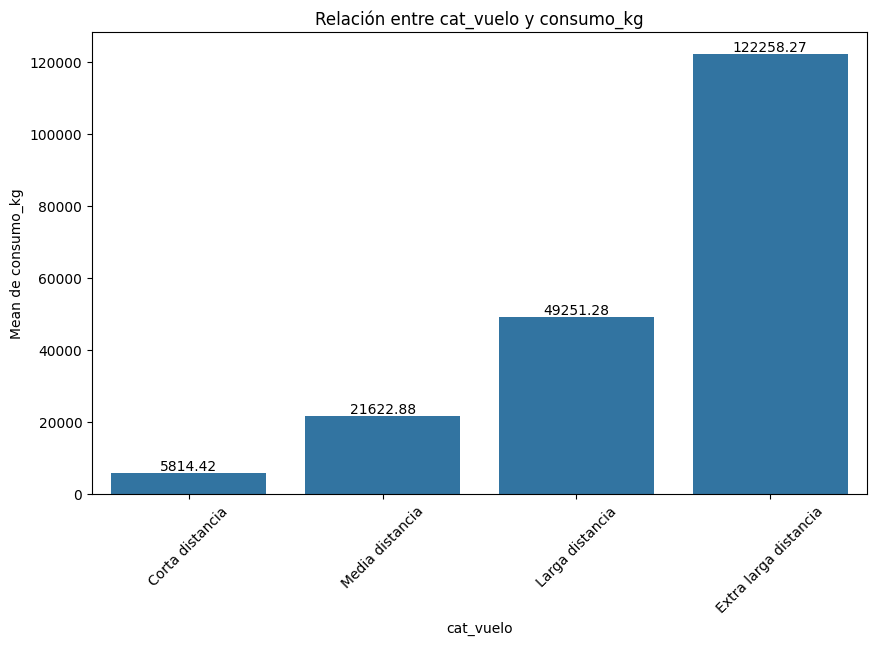

In [50]:

# Análisis multivariante entre "cat_vuelo", "ingresos" y "consumo_kg"
bvt.plot_categorical_numerical_relationship(
    df_air_jun, 
    categorical_col='cat_vuelo', 
    numerical_col='ingresos', 
    measure='mean', 
    show_values=True
)

bvt.plot_categorical_numerical_relationship(
    df_air_jun, 
    categorical_col='cat_vuelo', 
    numerical_col='consumo_kg', 
    measure='mean', 
    show_values=True
)

### Análisis multivariante: Relación entre "cat_vuelo", "ingresos" y "consumo_kg":
Observaciones de las visualizaciones:
Ingresos promedio por categoría de vuelo:

Los ingresos aumentan con la distancia del vuelo.

Extra larga distancia genera los mayores ingresos promedio, seguida por Larga distancia.
Consumo promedio (kg) por categoría de vuelo:

El consumo promedio también aumenta significativamente con la distancia del vuelo.

Extra larga distancia tiene el mayor consumo promedio, seguido por Larga distancia.

Parece interesante establecer ingresos / consumo kg como una medida de rentabilidad por cada categoría

C:\Users\Viajes Elkano\AppData\Local\Temp\ipykernel_79228\27829202.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rentabilidad_by_cat_vuelo = df_air_jun.groupby('cat_vuelo')['rentabilidad'].mean()
c:\Users\DataScience\ONLINE_DS_THEBRIDGE_DaniCastillo\007 ANALISIS DESCRIPTIVO\Unidad_02\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


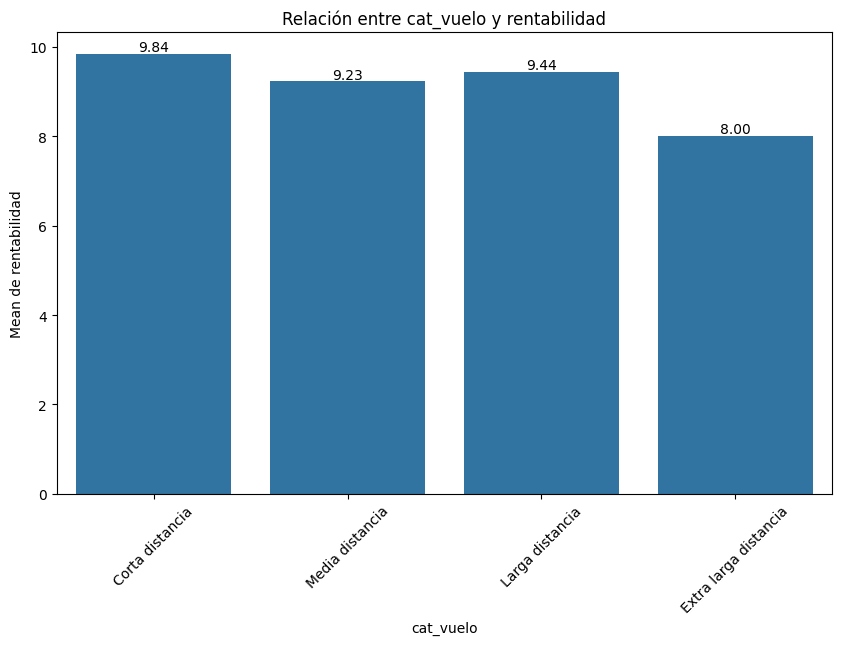

cat_vuelo
Corta distancia          9.844741
Media distancia          9.226899
Larga distancia          9.443020
Extra larga distancia    8.002884
Name: rentabilidad, dtype: float64


In [51]:
# Crear una nueva columna de rentabilidad como relación ingresos / consumo_kg
df_air_jun['rentabilidad'] = df_air_jun['ingresos'] / df_air_jun['consumo_kg']

# Analizar la rentabilidad promedio por categoría de vuelo
rentabilidad_by_cat_vuelo = df_air_jun.groupby('cat_vuelo')['rentabilidad'].mean()

# Visualizar la rentabilidad promedio por categoría de vuelo
bvt.plot_categorical_numerical_relationship(
    df_air_jun, 
    categorical_col='cat_vuelo', 
    numerical_col='rentabilidad', 
    measure='mean', 
    show_values=True
)

# Mostrar resultados
print(rentabilidad_by_cat_vuelo)

Análisis de rentabilidad (ingresos / consumo_kg) por categoría de vuelo:

Resultados:

Rentabilidad promedio por categoría:

Corta distancia: 9.84
Media distancia: 9.23
Larga distancia: 9.44
Extra larga distancia: 8.00

Observaciones:

Las rutas de Corta distancia y Larga distancia son las más rentables.
Las rutas de Extra larga distancia tienen la menor rentabilidad promedio, posiblemente debido al alto consumo de combustible en relación con los ingresos generados.

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.